In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os.path
import numpy as np

import cv2

In [2]:
train_path = '../input/data/train'
test_path = '../input/data/eval'
train_csv_path = os.path.join(train_path,'train.csv')
test_csv_path = os.path.join(test_path,'info.csv')
train_csv = pd.read_csv(train_csv_path)
test_csv = pd.read_csv(test_csv_path)

In [12]:
train_csv.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [16]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2700 non-null   object
 1   gender  2700 non-null   object
 2   race    2700 non-null   object
 3   age     2700 non-null   int64 
 4   path    2700 non-null   object
dtypes: int64(1), object(4)
memory usage: 105.6+ KB


In [20]:
train_csv.describe(include='all')

,id,gender,race,age,path
count,2700,2700,2700,2700.000000,2700
unique,2699,2,1,NaN,2700
top,003397,female,Asian,NaN,006542_female_Asian_21
freq,2,1658,2700,NaN,1
mean,NaN,NaN,NaN,37.708148,NaN
std,NaN,NaN,NaN,16.985904,NaN
min,NaN,NaN,NaN,18.000000,NaN
25%,NaN,NaN,NaN,20.000000,NaN
50%,NaN,NaN,NaN,36.000000,NaN
75%,NaN,NaN,NaN,55.000000,NaN


## train CSV

column: id, gender, race, age, path   
train data 수: 2700   
gener : female 1658 61.4% male 38.5&  
race : 모두 Asian   
age : mean 37.7   
path : 이미지 디렉토리 이름   

In [24]:
test_csv.head()

,ImageID,ans
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,0
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,0
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,0
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,0
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,0


In [28]:
1658/2700*100

61.40740740740741

## AGE 분포

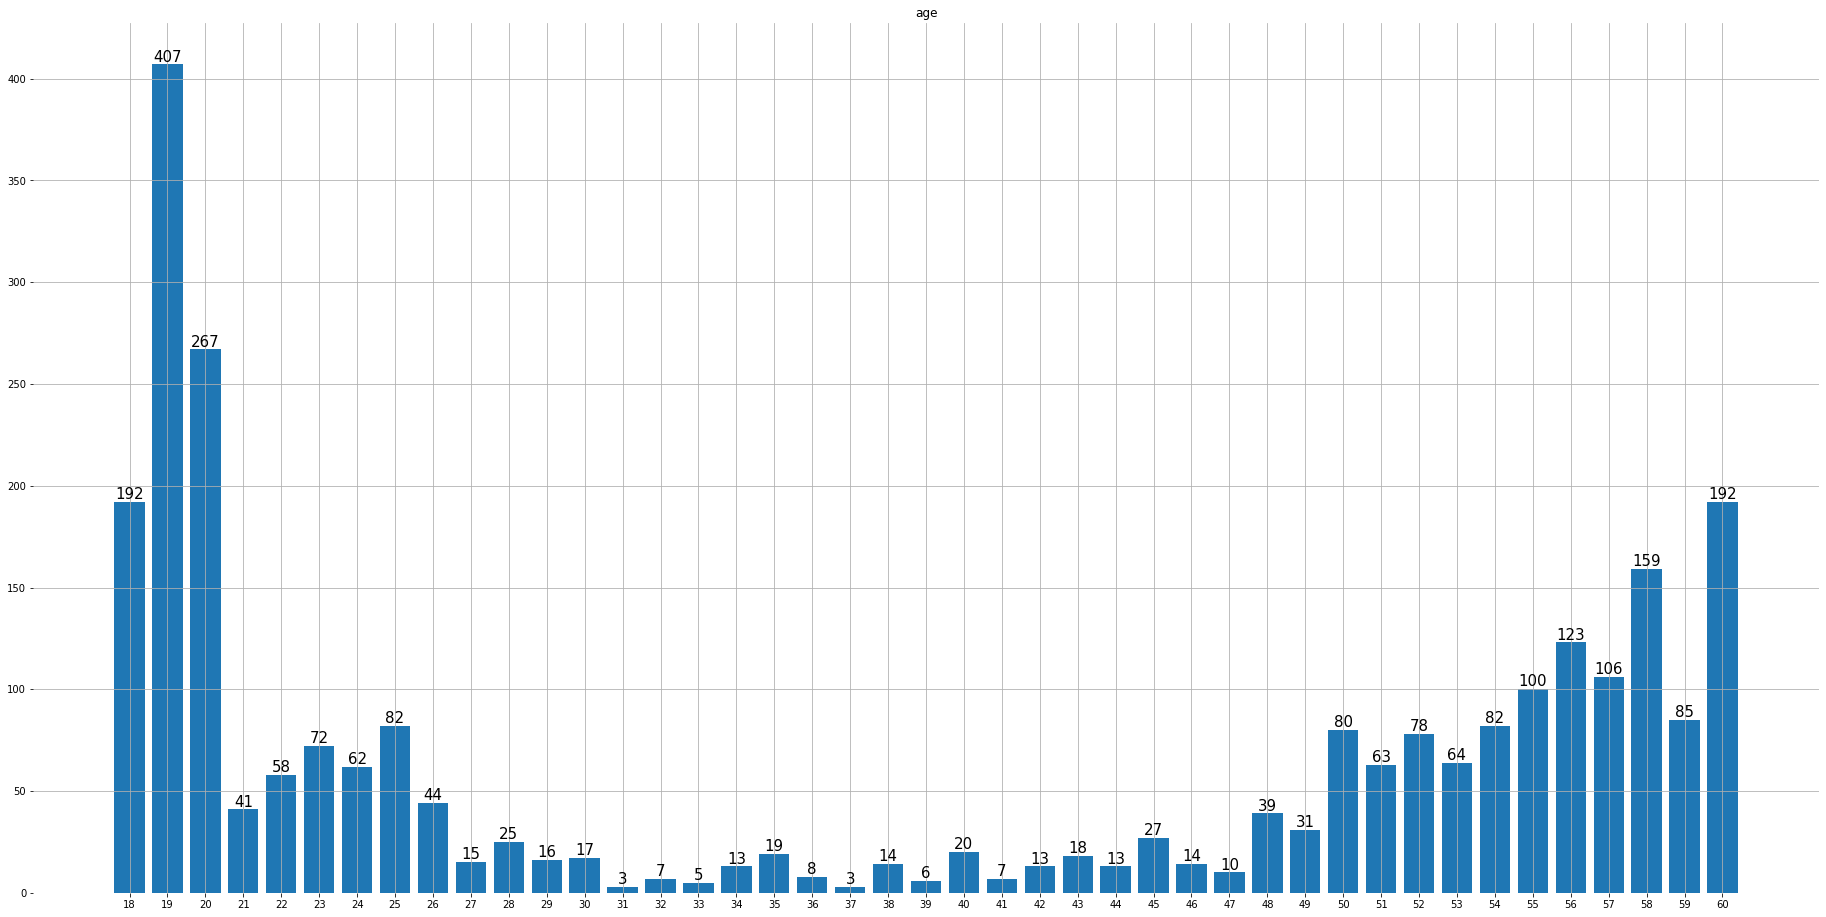

In [32]:
age_group= train_csv['age'].value_counts().sort_index()
fig =plt.figure(figsize=(32,16))
ax= fig.add_subplot(111)
ax.bar(age_group.index,age_group)
ax.set_title('age')
ax.set_xticks(age_group.index)
ax.set(frame_on=False)
ax.grid()
for idx, val in age_group.iteritems():
    ax.text(x=idx, y=val,s=val,
           va='bottom', ha='center',
           fontsize=15)
plt.show()

## 성별 나이 분포

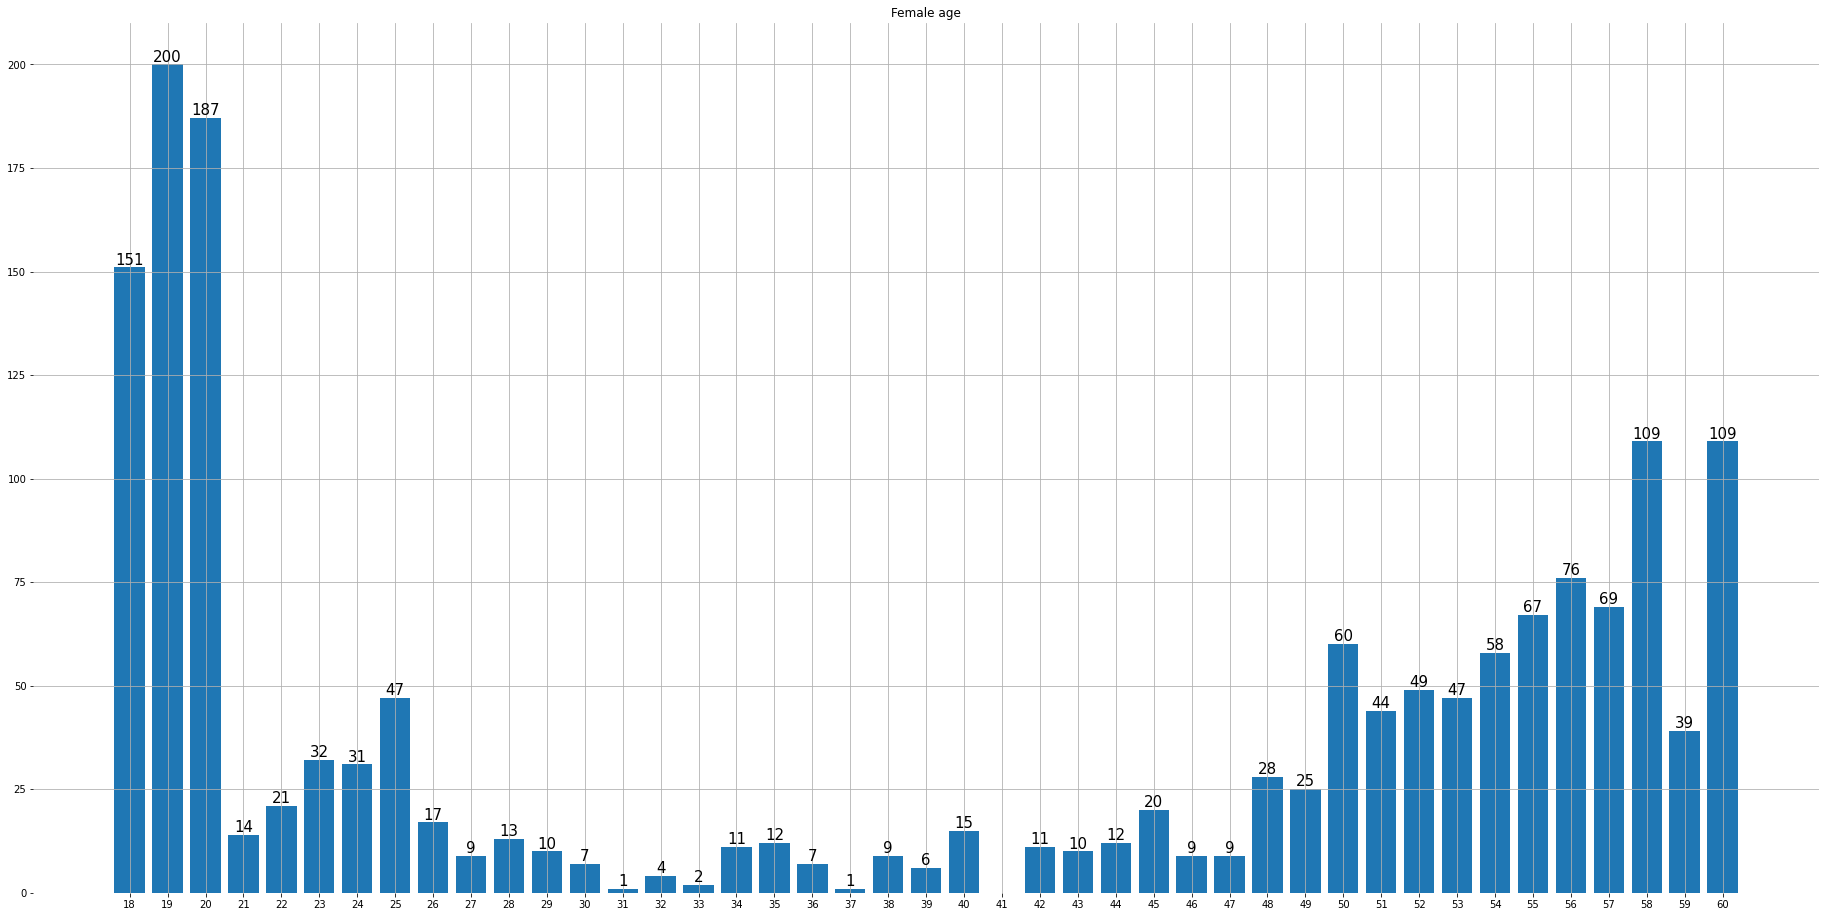

In [36]:
gender_group=train_csv.groupby('gender')['age'].value_counts()
fig =plt.figure(figsize=(32,16))
ax= fig.add_subplot(111)
ax.bar(gender_group['female'].index,gender_group['female'])
ax.set_title('Female age')
ax.set_xticks(age_group.index)
ax.set(frame_on=False)
ax.grid()
for idx, val in gender_group['female'].iteritems():
    ax.text(x=idx, y=val,s=val,
           va='bottom', ha='center',
           fontsize=15)
plt.show()

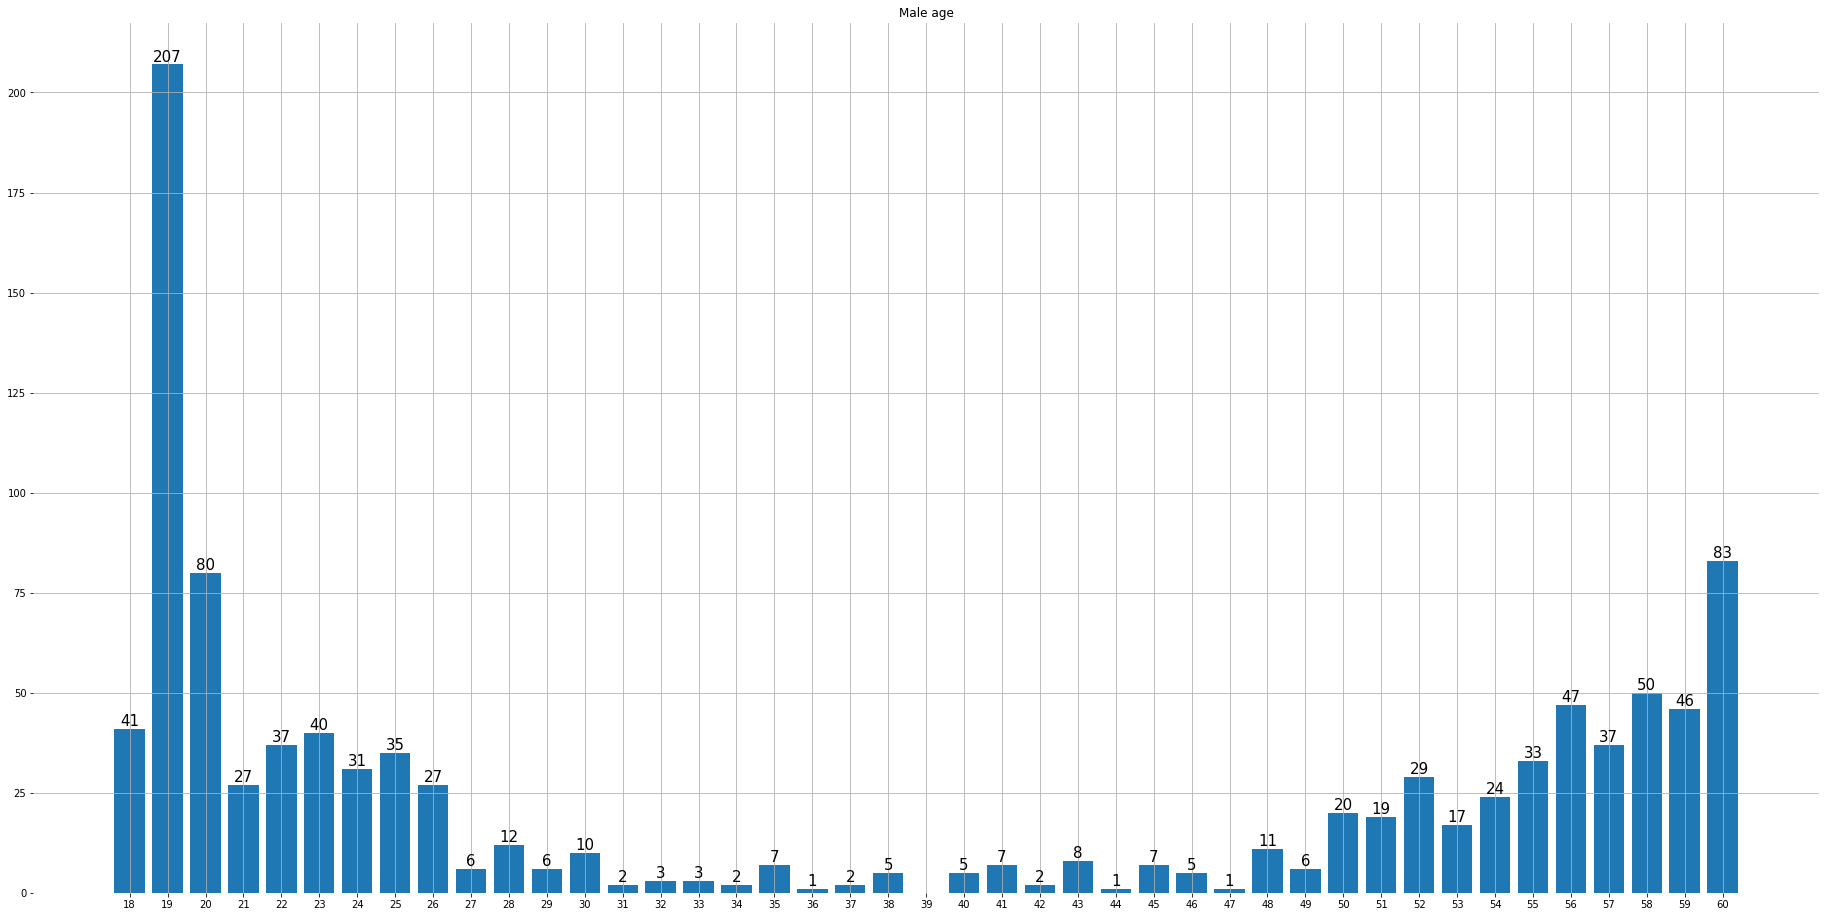

In [40]:
fig =plt.figure(figsize=(32,16))
ax= fig.add_subplot(111)
ax.bar(gender_group['male'].index,gender_group['male'])
ax.set_title('Male age')
ax.set_xticks(age_group.index)
ax.set(frame_on=False)
ax.grid()
for idx, val in gender_group['male'].iteritems():
    ax.text(x=idx, y=val,s=val,
           va='bottom', ha='center',
           fontsize=15)
plt.show()

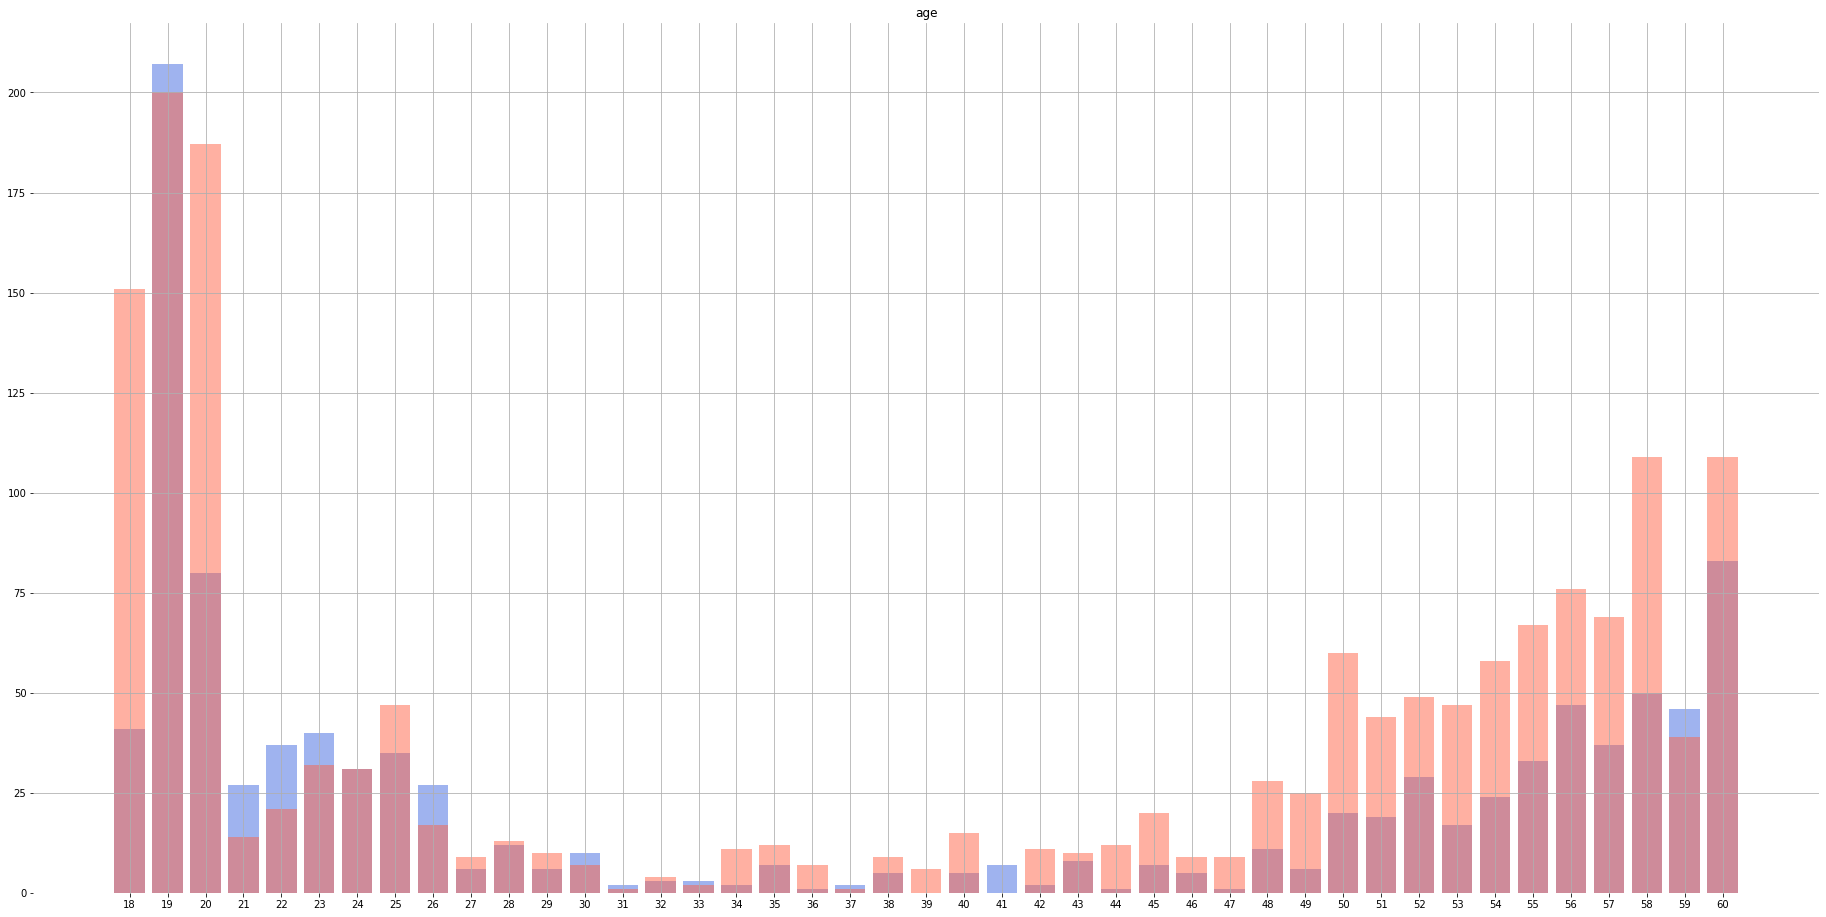

In [44]:
fig =plt.figure(figsize=(32,16))
ax= fig.add_subplot(111)
ax.bar(gender_group['male'].index,gender_group['male'],color='royalblue', alpha=0.5)
ax.bar(gender_group['female'].index,gender_group['female'],color='tomato',alpha=0.5)
ax.set_title('age')
ax.set_xticks(age_group.index)
ax.set(frame_on=False)
ax.grid()

plt.show()

In [48]:
ages = train_csv['age'].map(lambda x : (x//10)*10).value_counts()
ages/=2700

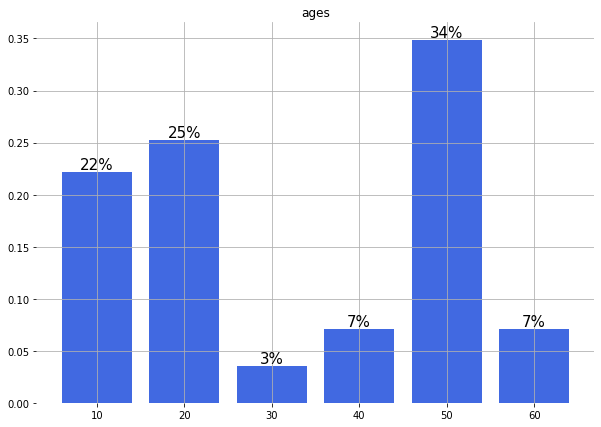

In [52]:
fig =plt.figure(figsize=(10,7))
ax= fig.add_subplot(111)
ax.bar(ages.index,ages,color='royalblue',width=8)
ax.set_title('ages')
ax.set_xticks(ages.index)
ax.set(frame_on=False)
ax.grid()
for idx, val in ages.iteritems():
    ax.text(x=idx, y=val,s=str(int(val*100))+'%',
           va='bottom', ha='center',
           fontsize=15)
plt.show()

In [56]:
train_image_path = os.path.join(train_path,'images')

In [60]:
print(len(glob.glob(os.path.join(train_image_path,'*'))))

2700


In [64]:

for idx, name in enumerate(train_csv['path']):
    image_path=os.path.join(train_image_path,name)
    train_csv.loc[idx,'total_img']=len(glob.glob(os.path.join(image_path,'*.jpg')))
    train_csv.loc[idx,'normal_img']=len(glob.glob(os.path.join(image_path,'normal*')))
    train_csv.loc[idx,'incorrect_img']=len(glob.glob(os.path.join(image_path,'in*')))
    train_csv.loc[idx,'mask_img']=len(glob.glob(os.path.join(image_path,'mask*')))

In [68]:
n_total_img=train_csv['total_img'].unique()
n_noraml_img=list(map(int,train_csv['normal_img'].unique()))
n_incorrect_img=list(map(int,train_csv['incorrect_img'].unique()))
n_mask_img=list(map(int,train_csv['mask_img'].unique()))
print(f'모든 이미지 갯수 : {n_total_img}')
print(f'일반 이미지 갯수 :{n_noraml_img} ')
print(f'잘못착용한 마스크 이미지 갯수 :{n_incorrect_img} ')
print(f'정상착용한 마스크 이미지 갯수 :{n_mask_img} ')

모든 이미지 갯수 : [7. 0. 1. 6.]
일반 이미지 갯수 :[1] 
잘못착용한 마스크 이미지 갯수 :[1] 
정상착용한 마스크 이미지 갯수 :[5] 


In [71]:
image_path=os.path.join(train_image_path,train_csv['path'][0])

In [ ]:
len(glob.glob(os.path.join(image_path,'*')))

In [53]:
train_csv[train_csv['total_img']==6]

,id,gender,race,age,path,total_img,normal_img,incorrect_img,mask_img
2584,006626,male,Asian,19,006626_male_Asian_19,6.0,1.0,1.0,5.0
2593,006643,male,Asian,19,006643_male_Asian_19,6.0,1.0,1.0,5.0


In [57]:
from PIL import Image

In [61]:
idx=int(np.random.randint(0,2701,1))
image_path=os.path.join(train_image_path,train_csv.loc[idx,'path'],'*')
for path in glob.glob(image_path):
    image=Image.open(path)
    print(image.size)



(384, 512)
(384, 512)
(384, 512)
(384, 512)
(384, 512)
(384, 512)
(384, 512)


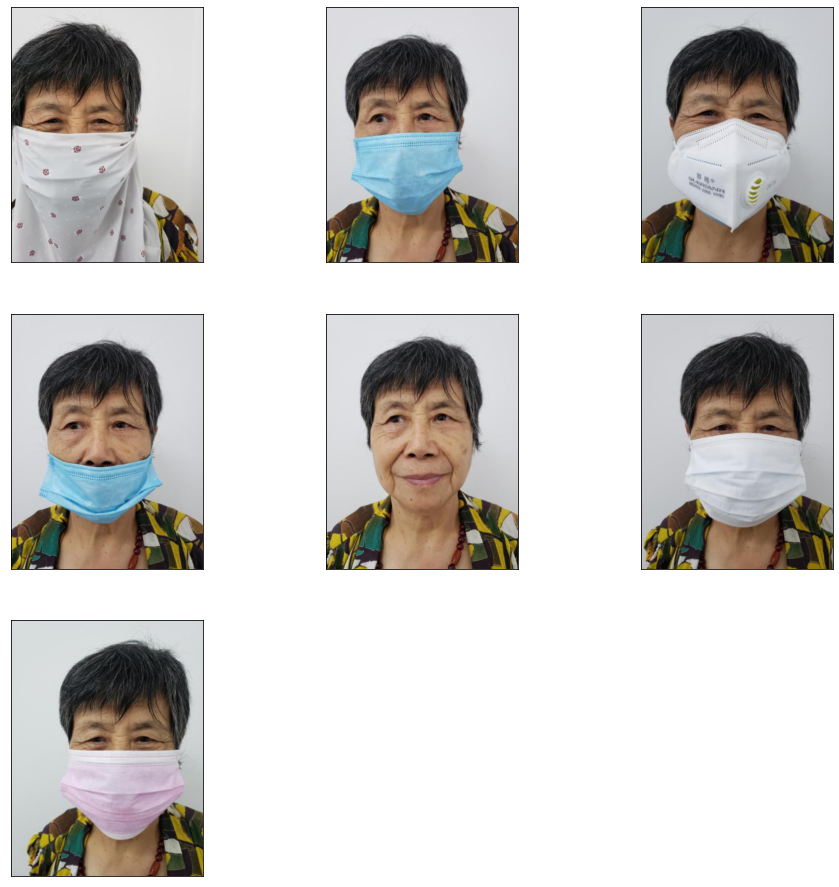

In [65]:
idx=int(np.random.randint(0,2701,1))
image_path=os.path.join(train_image_path,train_csv.loc[idx,'path'],'*')
fig = plt.figure(figsize=(16,16))
for i, path in enumerate(glob.glob(image_path)):
    img = Image.open(path)
    ax = fig.add_subplot(3, 3, i+1)
    ax.imshow(img)
    ax.set_xticks([]), ax.set_yticks([])
plt.show()

# 엣지 탐색을 통한 주름살 

In [69]:
idx=int(np.random.randint(0,2701,1))
image_path=os.path.join(train_image_path,train_csv.loc[idx,'path'],'*')

In [1]:
img_gray = cv2.imread(image_path[0], cv2.IMREAD_GRAYSCALE)

cv2.namedWindow("Canny Edge")
img_canny = cv2.Canny(img_gray, 50, 150)
plt.show(img_canny)

NameError: name 'cv2' is not defined